In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print(data.shape)
raw_df.head()

(506, 13)


,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [3]:
features = ['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
ds=pd.DataFrame(data,columns=features)
target = raw_df.values[1::2, 2]

ds.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
ds["RAD"]=ds["RAD"].astype("category")
ds.dtypes


CRIM        float64
ZN          float64
INDUS       float64
CHAS        float64
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
dtype: object

In [5]:
ds=pd.get_dummies(ds,prefix="RAD")
ds.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,LSTAT,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,...,4.98,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,...,9.14,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,...,4.03,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,...,2.94,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,...,5.33,0,0,1,0,0,0,0,0,0


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler();
scaler=scaler.fit(ds)

#minmax scaler scales the notnormally  distributed data in the range of 0 $ 1. while standard scaler is used for normally distributed.

scaledData=scaler.transform(ds)

dss=pd.DataFrame(scaledData,columns=ds.columns)
dss.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,LSTAT,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.208015,0.287234,...,0.089680,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.104962,0.553191,...,0.204470,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.104962,0.553191,...,0.063466,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.066794,0.648936,...,0.033389,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.066794,0.648936,...,0.099338,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


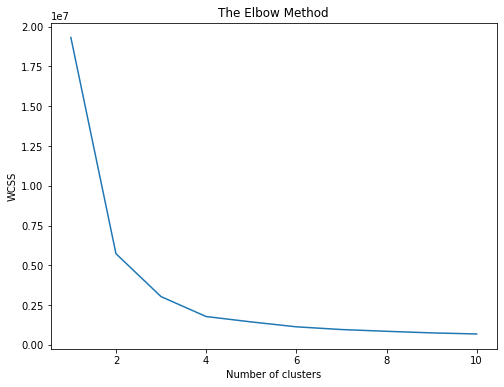

In [7]:
x = ds.iloc[:, :-1].values #last column values excluded

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='random',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

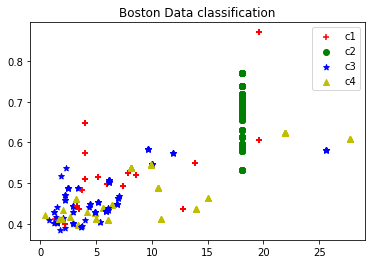

In [8]:
clust=KMeans(n_clusters=4,max_iter=500,random_state=0).fit(dss)
clusterCenter=clust.cluster_centers_
ccd=pd.DataFrame(clusterCenter,columns=dss.columns)
ccd
labels=clust.labels_
len(labels)
clusterIds=list(labels)

originalDataAsNumpy=scaler.inverse_transform(dss)
#converting numpy to dataset
originalDataset=pd.DataFrame(originalDataAsNumpy,columns=dss.columns)

#adding the labelled column to the originalDataset
originalDataset["Label"]=labels

#saving data on the system as OriginalData.csv
#originalDataset.to_csv("originalData.csv")
#to see whether data contains the label or not
originalDataset.Label[0]

import pylab as pl
len=originalDataset.shape[0]
len
for i in range(0, len):
   if originalDataset.Label[i] == 0:
      c1 = pl.scatter(originalDataset.iloc[i,2],originalDataset.iloc[i,4],c='r', marker='+')
   elif originalDataset.Label[i]  == 1:
      c2 = pl.scatter(originalDataset.iloc[i,2],originalDataset.iloc[i,4],c='g',marker='o')
   elif originalDataset.Label[i]  == 2:
      c3 = pl.scatter(originalDataset.iloc[i,2],originalDataset.iloc[i,4],c='b',marker='*')
   elif originalDataset.Label[i] == 3:
      c4 = pl.scatter(originalDataset.iloc[i,2],originalDataset.iloc[i,4],c='y',marker='^')
pl.legend([c1, c2, c3,c4], ['c1','c2','c3','c4'])  
pl.title('Boston Data classification')
pl.show()